In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import utils
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

Using TensorFlow backend.


In [2]:
#load data frame
#data preprocessing
df0 = pd.read_csv('ch1.csv')
df = df0.iloc[:,1:266]
df.insert(0,'y',df.iloc[:,7])
df = df.drop(columns=['yield'])
# transfer categorical variables
df['month'] = df['month'].astype('category')
df['alloy'] = df['alloy'].astype('category')
df['heat'] = df['heat'].astype('category')
# make a copy of dataframe
dfcopy = df.copy()
df = df.loc[:,df.sum(axis=0)!= 0]

In [10]:
dfcopy.head()

,y,INELAP,steps,weight,width,gauge,alloy,month,heat,density,...,minl_r56,minl_r73,minl_r8,minl_r9,minl_rl,minl_ro1,minl_roo,minl_sl,minl_slt,minl_t
0,0.899391,0.010687,0.035191,0.700624,0.743731,0.25,226,6,22889,0.981424,...,0,0,0,0,0,0,0,0,0,0
1,0.819189,0.009070,0.029326,0.646706,0.730701,0.25,226,6,22889,0.981424,...,0,0,0,0,0,0,0,0,0,0
2,0.754584,0.025584,0.041056,0.685746,0.733465,0.25,226,6,22888,0.981424,...,0,0,0,0,0,0,0,0,0,0
3,0.937805,0.010707,0.023460,0.666396,0.735439,0.25,226,6,22872,0.978328,...,0,0,0,0,0,0,0,0,0,0
4,0.786821,0.009080,0.049853,0.677850,0.738993,0.25,220,6,22875,0.984520,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dfcopy.describe()

,y,INELAP,steps,weight,width,gauge,density,finish_gauge,act_A,act_B,...,minl_r56,minl_r73,minl_r8,minl_r9,minl_rl,minl_ro1,minl_roo,minl_sl,minl_slt,minl_t
count,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,...,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000,15558.000000
mean,0.587387,0.020578,0.039684,0.642981,0.637583,0.273616,0.974033,0.129171,0.039479,0.053318,...,0.001671,0.000064,0.000193,0.000129,0.001350,0.000193,0.000129,0.000064,0.000064,0.000064
std,0.357879,0.030406,0.041035,0.172380,0.157484,0.126242,0.029622,0.144252,0.038605,0.071337,...,0.040847,0.008017,0.013885,0.011338,0.036716,0.013885,0.011338,0.008017,0.008017,0.008017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.193210,0.006009,0.017595,0.579750,0.527739,0.250000,0.953560,0.034110,0.017647,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.776124,0.011353,0.026393,0.670801,0.633564,0.250000,0.978328,0.064619,0.026471,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.893861,0.024877,0.046921,0.725735,0.747680,0.250000,0.996904,0.195445,0.047059,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.650000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


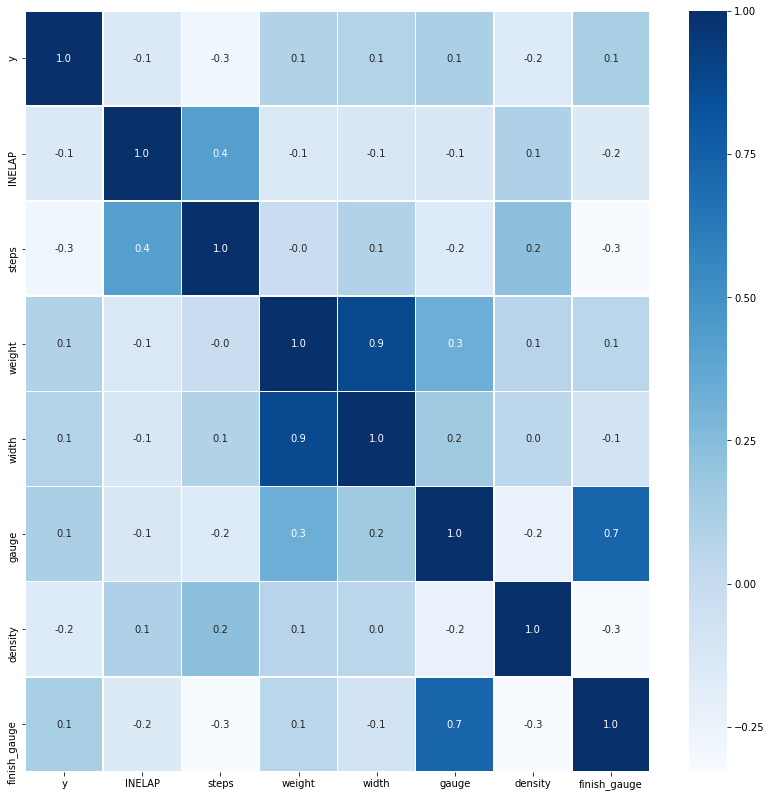

In [3]:
# visualize the correlation plot of numerical vairiables
import seaborn as sns
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dfcopy.iloc[:,0:11].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")

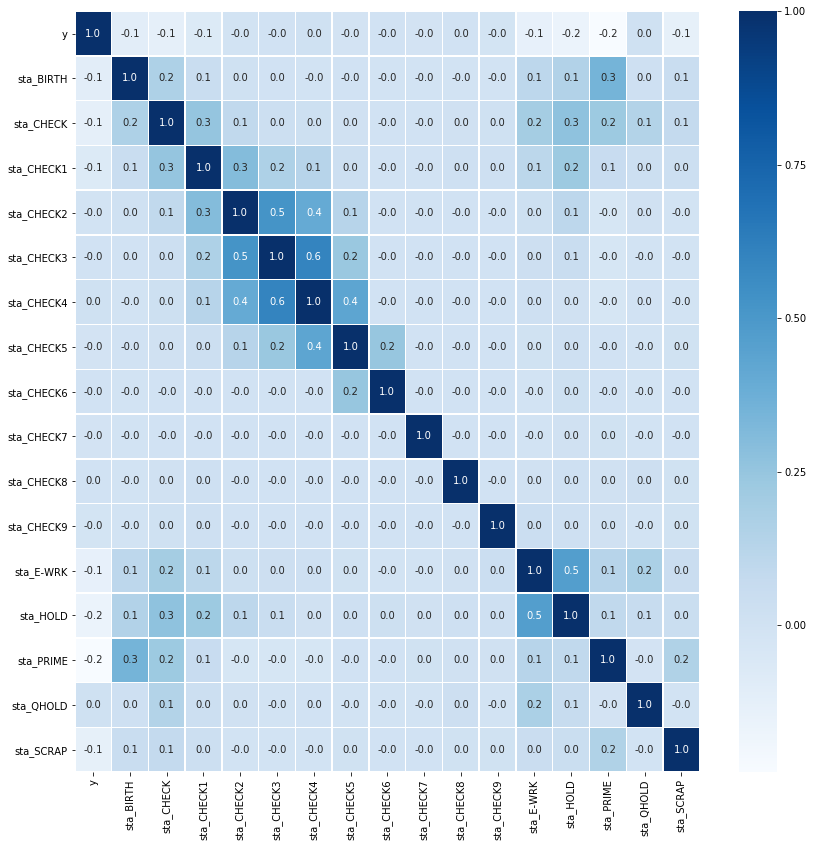

In [4]:
# visualize the correlation plot of status 
import seaborn as sns
f,ax = plt.subplots(figsize=(14, 14))
sta_attributes = dfcopy[['y','sta_BIRTH',
 'sta_CHECK',
 'sta_CHECK1',
 'sta_CHECK2',
 'sta_CHECK3',
 'sta_CHECK4',
 'sta_CHECK5',
 'sta_CHECK6',
 'sta_CHECK7',
 'sta_CHECK8',
 'sta_CHECK9',
 'sta_E-WRK',
 'sta_HOLD',
 'sta_PRIME',
 'sta_QHOLD',
 'sta_SCRAP']]

sns.heatmap(sta_attributes.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")

(array([1675.,   65.,   70.,   86.,  100.,  114.,  107.,  102.,  159.,
         258.,  220.,  190.,  168.,  116.,   99.,   99.,  107.,   79.,
          59.,   61.,   57.,   60.,   55.,   59.,   54.,   48.,   40.,
          37.,   48.,   45.,   50.,   52.,   38.,   45.,   47.,   43.,
          46.,   50.,   49.,   55.,   69.,   70.,  121.,  112.,  147.,
         143.,  170.,  151.,  113.,   59.,   68.,   51.,   36.,   53.,
          38.,   36.,   43.,   48.,   26.,   37.,   42.,   32.,   50.,
          51.,   42.,   39.,   31.,   48.,   53.,   66.,   75.,   81.,
         100.,   99.,  115.,  118.,  143.,  155.,  174.,  203.,  203.,
         265.,  297.,  324.,  391.,  414.,  452.,  445.,  476.,  490.,
         507.,  478.,  469.,  430.,  354.,  312.,  260.,  216.,  155.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0

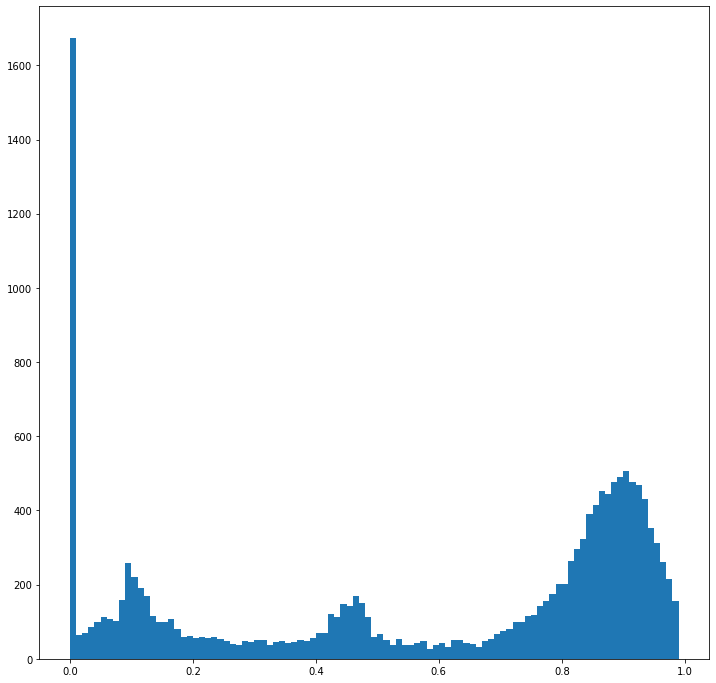

In [4]:
# distribution of the yield
f,ax = plt.subplots(figsize=(12, 12))
plt.hist([df.y], bins = np.arange(0, 1, 0.01))

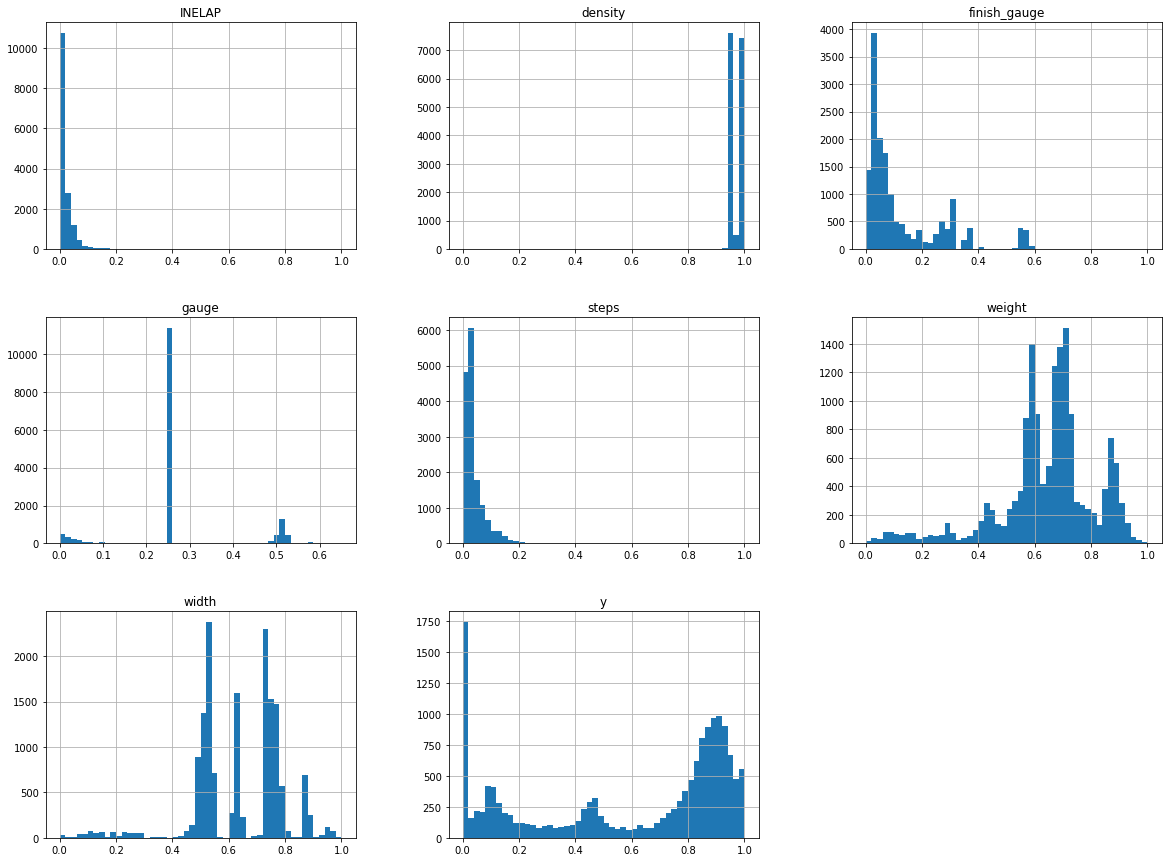

In [6]:
# distribution plot of numerical variables
dfcopy.iloc[:,0:11].hist(bins=50, figsize=(20,15))
pass

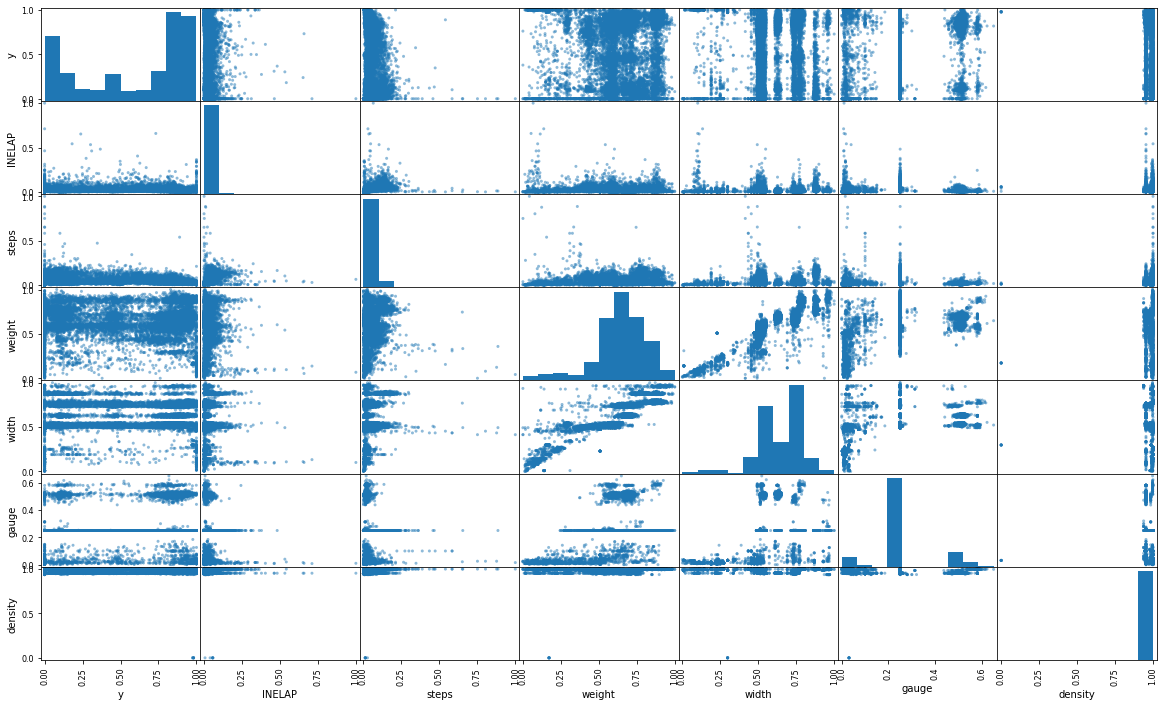

In [7]:
# distribion scatter plot of numerical variables
from pandas.plotting import scatter_matrix
attributes=['y','INELAP', 'steps', 'weight', 'width','gauge', 'density']
scatter_matrix(dfcopy[attributes],figsize=(20,12))
pass

In [5]:
# min-max scale
cat_attributes = ['month','alloy','heat']
num_attributes = ['INELAP','steps', 'weight','width','gauge','density','finish_gauge']
num_attributes = num_attributes+ list(dfcopy.columns[11:252])
scalable_variables = num_attributes

for var in scalable_variables:
    maxi, mini = df[var].max(), df[var].min()
    df.loc[:,var] = (df[var] - mini) / (maxi - mini)

In [6]:
np.where(dfcopy.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [7]:
# two performance evaluation method: MSE AND MAE
def ModelPerformance(y_test,y_pred):
    error = y_test-y_pred
    RMSE = np.sqrt(np.mean(error*error))
    return(RMSE)

def MAE(y_test,y_pred):
    error = np.abs(y_test-y_pred)
    return(np.mean(error))

In [8]:
# create a new dependent variable, if yield = 0, set y = 0; if yield >0, set y = 1;
dfzero = dfcopy.copy()
dfzero.insert(0,'zero',df.iloc[:,0])
dfzero.zero[dfzero.y == 0] = 0
dfzero.zero[dfzero.y > 0] = 1
dfzero = dfzero.drop(columns = 'y')

C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Haipeng Pan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
# train-test split
Xz=dfzero.iloc[:,1:]
yz=dfzero.iloc[:,0]
from sklearn.model_selection import train_test_split
Xz_train, Xz_test, yz_train, yz_test = train_test_split(Xz, yz, test_size=0.2, random_state=1)

In [10]:
# classification model performance

def ModelPerformanceC(y_test,y_pred):
    
    y_true = y_test
    mat = confusion_matrix(y_true, y_pred, labels=[1,0])
    R = mat[0][0] / (mat[0][0] + mat[1][0])
    P = mat[0][0] / (mat[0][0] + mat[0][1])
    A = (mat[0][0] + mat[1][1]) / (mat[0][0] + mat[0][1] + mat[1][1] + mat[1][0])
    F_1 = 2*P*R / (P+R)
    
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    print("#Confusion Matrix#")
    print("\n", mat)
    print("\nAccuracy: " + str(A))
    print("Recall: " + str(R))
    print("Precision: " + str(P))
    print("F1 Score: " + str(F_1))
    print("AUC: " + str(roc_auc))
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'darkorange', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'navy',linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

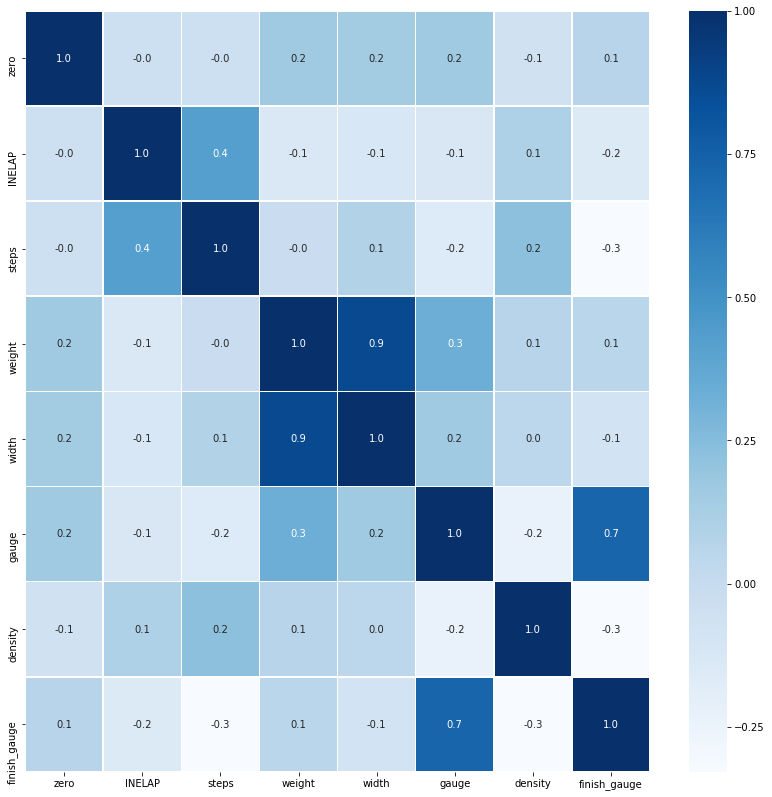

In [8]:
# numerical numbers model peformance
import seaborn as sns
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dfzero.iloc[:,0:11].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")

#Confusion Matrix#

 [[2747   23]
 [  59  283]]

Accuracy: 0.9736503856041131
Recall: 0.9789736279401283
Precision: 0.9916967509025271
F1 Score: 0.9852941176470588
AUC: 0.909591065509743


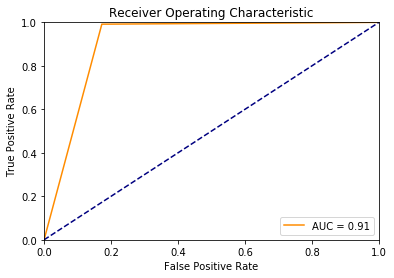

rmse: None
score: 0.9736503856041131


In [19]:
# train random forest classification model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1500,max_depth = 1000,min_samples_split = 10)
rfcm=rfc.fit(Xz_train, yz_train)
yz_pred_rfc=rfcm.predict(Xz_test)

print('rmse:',ModelPerformanceC(yz_test,yz_pred_rfc))
print('score:',rfcm.score(Xz_test, yz_test))

Text(0.5, 1.0, 'Feature Importance')

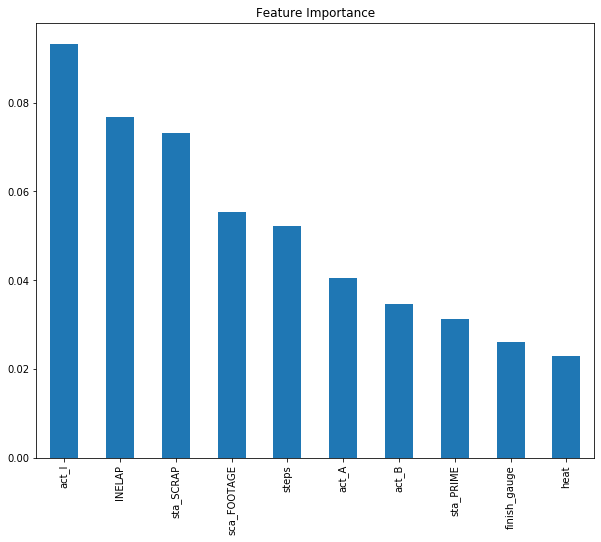

In [17]:
# find the key-drivers of 0-yield predictions
features = list(dfzero.columns[1:])
f,ax = plt.subplots(figsize=(10,8))
importances = rfcm.feature_importances_

feat_importances = pd.Series(importances, index=dfzero.columns[1:])
feat_importances.nlargest(10).plot.bar()

plt.title("Feature Importance")

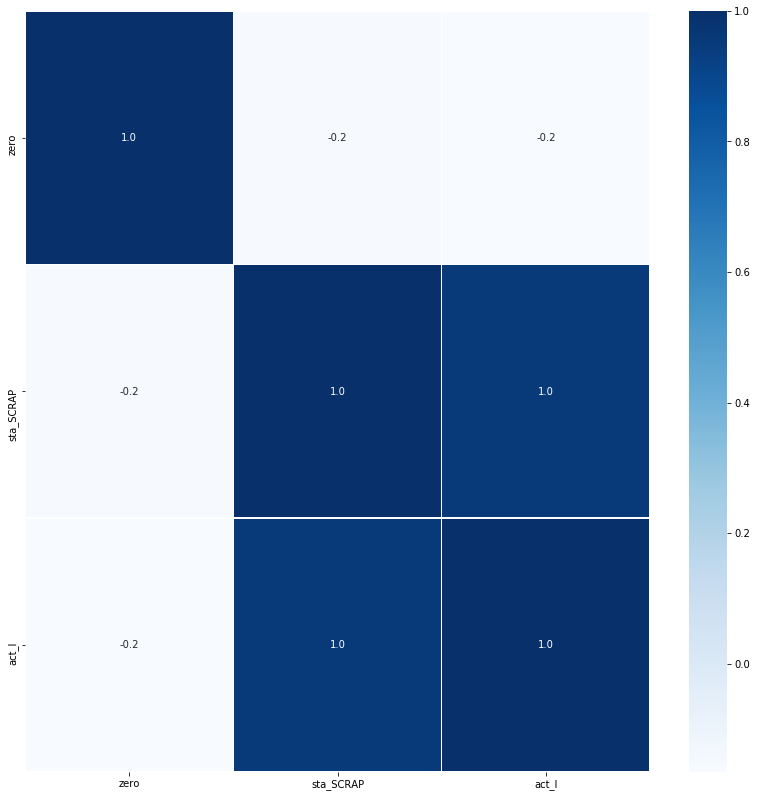

In [18]:
# visualze the correlation of the key_drivers
import seaborn as sns
f,ax = plt.subplots(figsize=(14, 14))
sta_attributes = dfzero[['zero','sta_SCRAP','act_I']]

sns.heatmap(sta_attributes.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="Blues")

In [11]:
# split train-test datasets in the non-zero portion
dfNonZero = df[df.y > 0]
Xnz=dfNonZero.iloc[:,1:]
ynz=dfNonZero.iloc[:,0]
from sklearn.model_selection import train_test_split
Xnz_train, Xnz_test, ynz_train, ynz_test = train_test_split(Xnz, ynz, test_size=0.05, random_state=1)

In [ ]:
# Grid-Searching
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': (20,30,40),
            'n_estimators': (200,500,1000,1500)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print(grid_result.best_estimator_) 
    rfr = grid_result.best_estimator_.fit(X,y)
    
    return rfr

rfr = rfr_model(Xnz_train, ynz_train) # !!! careful, takes about 30min to run!!!

In [13]:
# tune RFR model (best rmse = 0.2051 / (30,1000))

rfnz = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rfnz=rfnz.fit(Xnz_train, ynz_train)
y_pred_rfnz=rfnz.predict(Xnz_test)
print('rmse:',ModelPerformance(ynz_test,y_pred_rfnz))
print('score:',rfnz.score(Xnz_test, ynz_test))
print('mae:',MAE(ynz_test,y_pred_rfnz))

rmse: 0.20577472736594155
score: 0.5681879000506918
mae: 0.13166774538095538


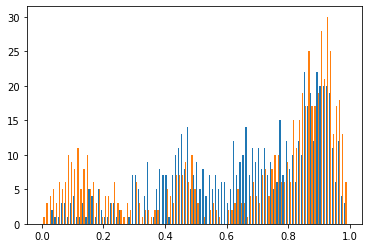

<Figure size 2160x1440 with 0 Axes>

In [14]:
# plot comparision of model predicted yield vs. true yield
import matplotlib.pyplot as plt

plt.hist([y_pred_rfnz, ynz_test], bins = np.arange(0, 1, 0.01))
fig= plt.figure(figsize=(30,20))
plt.show()

In [15]:
# take random samples from planned data in operation details
od_y = pd.read_csv('od_y.csv')
odyield = od_y.sample(n = 500)['SDYELD']

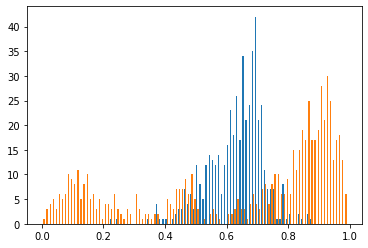

<Figure size 2160x1440 with 0 Axes>

In [16]:
# plot comparison of the PLANNED yield vs. true yield
plt.hist([odyield, ynz_test], bins = np.arange(0, 1, 0.01))
fig= plt.figure(figsize=(30,20))
plt.show()

In [17]:
# apply the model again on the whole dataset
y_pred_all = rfnz.predict(Xnz)
print('rmse:',ModelPerformance(ynz,y_pred_all))
print('score:',rfnz.score(Xnz, ynz))
print('mae:',MAE(ynz,y_pred_all))

rmse: 0.08603136176084042
score: 0.9241430586369045
mae: 0.05285781775362824


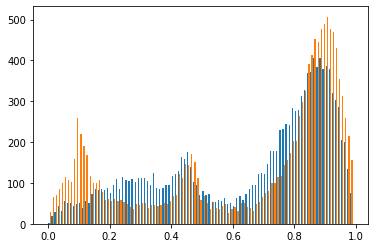

<Figure size 2160x1440 with 0 Axes>

In [18]:
# plot prediction of the whole dataset
plt.hist([y_pred_all, ynz], bins = np.arange(0, 1, 0.01))
fig= plt.figure(figsize=(30,20))
plt.show()

In [19]:
# calculate model improvement on yield expectation
a = np.mean(y_pred_rfnz)
b = np.mean(od_y['SDYELD'])
c = np.mean(ynz)

print('True yield:',c)
print('Planned yield:',b)
print('Model Predicted yield:',a)
print('')
print('Average Improvement:', 100 * (abs(b-c)-abs(a-c))/abs(b-c), '%')

True yield: 0.6568835649084239
Planned yield: 0.6264689150292351
Model Predicted yield: 0.6651939812045037

Average Improvement: 72.67627170100636 %


In [111]:
# error analysis ynz_test,y_pred_rfnz
y_compare = pd.DataFrame(ynz_test)
y_compare['prediction'] = y_pred_rfnz
y_compare['abs_error'] = abs(ynz_test - y_pred_rfnz)
y_compare['abs_error'] = y_compare['abs_error'].astype('float64')

y_compare.head()

,y,prediction,abs_error
4437,0.617855,0.374776,0.243079
6362,0.274641,0.547138,0.272497
15368,1.000000,0.990333,0.009667
292,0.829769,0.779233,0.050535
1634,0.853513,0.722886,0.130627


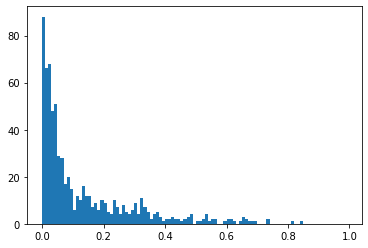

<Figure size 2160x1440 with 0 Axes>

In [112]:
# visualize error distribution
plt.hist(y_compare['abs_error'], bins = np.arange(0, 1, 0.01))
fig= plt.figure(figsize=(30,20))
plt.show()

In [ ]:
# Other models with less ideal performances

In [ ]:
# SVR

In [ ]:
def svr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator = SVR(),
        param_grid={
            'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
            'C' : [1,10,100],
            'degree' : [2,3,4],
            #'coef0' : [0.01,10,0.5],
            #'gamma' : ('auto','scale')
        },
        cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print(grid_result.best_estimator_) 
    svr = grid_result.best_estimator_.fit(X,y)
    
    return svr

svr = svr_model(X_train, Y_train) # !!! takes very long time and hard to stop !!!

In [ ]:
svr = SVR(kernel='poly', C=100, gamma=0.1, degree=3, epsilon=.1, coef0=1).fit(Xnz_train, ynz_train)
y_pred_svr = svr.predict(Xnz_test)

print('rmse:',ModelPerformance(ynz_test,y_pred_svr))
print('score:',svr.score(Xnz_test, ynz_test))
print('mae:',MAE(ynz_test,y_pred_svr))

In [ ]:
# Neural Network

In [13]:
features = np.array(Xnz_train)
targets = np.array(ynz_train)
features_val= np.array(Xnz_test)
targets_val = np.array(ynz_test)

In [15]:
# building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(Xnz_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

In [16]:
# Compiling
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                8032      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Training
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=1)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
    score = model.evaluate(features_val, targets_val)
    print("Validation MSE:", score[1], "\n")

Epoch 1/250
13216/13216 [==============================] - 1s 67us/step - loss: 696295.3722 - mse: 696295.5000
Epoch 2/250
13216/13216 [==============================] - 1s 49us/step - loss: 87675.7439 - mse: 87675.7188
Epoch 3/250
13216/13216 [==============================] - 1s 48us/step - loss: 35926.0143 - mse: 35926.0234
Epoch 4/250
13216/13216 [==============================] - 1s 50us/step - loss: 18930.0656 - mse: 18930.0664
Epoch 5/250
13216/13216 [==============================] - 1s 48us/step - loss: 11250.5009 - mse: 11250.5000
Epoch 6/250
13216/13216 [==============================] - 1s 49us/step - loss: 8596.1417 - mse: 8596.1436
Epoch 7/250
13216/13216 [==============================] - 1s 48us/step - loss: 5581.2547 - mse: 5581.2549
Epoch 8/250
13216/13216 [==============================] - 1s 48us/step - loss: 3225.9695 - mse: 3225.9709
Epoch 9/250
13216/13216 [==============================] - 1s 49us/step - loss: 1986.9400 - mse: 1986.9398
Epoch 10/250
13216/13216 

13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 159/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 160/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 161/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0975 - mse: 0.0975
Epoch 162/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 163/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 164/250
13216/13216 [==============================] - 1s 49us/step - loss: 0.0976 - mse: 0.0976
Epoch 165/250
13216/13216 [==============================] - 1s 51us/step - loss: 0.0976 - mse: 0.0976
Epoch 166/250
13216/13216 [==============================] - 1s 50us/step - loss: 0.0976 - mse: 0.0976
Epoch 167/250
13216/13216 [==============================] - 1s 49us/step - loss: 0.097

13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 66/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 67/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 68/250
13216/13216 [==============================] - 1s 48us/step - loss: 0.0976 - mse: 0.0976
Epoch 69/250
13216/13216 [==============================] - 1s 51us/step - loss: 0.0976 - mse: 0.0976
Epoch 70/250
13216/13216 [==============================] - 1s 51us/step - loss: 0.0976 - mse: 0.0976
Epoch 71/250
13216/13216 [==============================] - 1s 51us/step - loss: 0.0976 - mse: 0.0976
Epoch 72/250
13216/13216 [==============================] - 1s 50us/step - loss: 0.0976 - mse: 0.0976
Epoch 73/250
13216/13216 [==============================] - 1s 51us/step - loss: 0.0976 - mse: 0.0976
Epoch 74/250
13216/13216 [==============================] - 1s 49us/step - loss: 0.0976 - mse: 

KeyboardInterrupt: 

In [ ]:
# Prediction
y_pred_nn = model.predict(features_val, verbose=1)
print('rmse:',ModelPerformance(ynz_test,y_pred_nn))
print('score:',model.score(Xnz_test, ynz_test))
print('mae:',MAE(ynz_test,y_pred_nn))

In [ ]:
# Adaboost

In [ ]:
def adb_model(X, y):
    gsc = GridSearchCV(
        estimator=AdaBoostRegressor(),
        param_grid={
             'n_estimators': [50, 100, 1000],
             'learning_rate' : [0.01,0.05,0.1,0.3,1],
             'loss' : ['linear', 'square', 'exponential']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    print(grid_result.best_estimator_) 
    adb = grid_result.best_estimator_.fit(X,y)
    
    return adb_model

adb = adb_model(X_train, Y_train) # !!!

In [ ]:
# Prediction
y_pred_adb = adb.predict(Xnz_test)
print('rmse:',ModelPerformance(ynz_test,y_pred_adb))
print('score:',adb.score(Xnz_test, ynz_test))
print('mae:',MAE(ynz_test,y_pred_adb))